**Build model for CIFAR100, MNIST, Fashion MNIST (test data - accuracy of +80%) - plot metrics accuracy, sparse_cat_acc, top_k, categorical_acc, sparse_topk**

**Use activation as layers in the model EarlyStopping and ModelCheckPoint**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100,mnist,fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

**cifar100**

In [2]:
#loading the data
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
#preprocessing
x_train=x_train.reshape((-1,32*32*3))
x_test=x_test.reshape((-1,32*32*3))

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 100)
(10000, 100)


In [14]:
# Model building

#initializer=keras.initializers.glorot_normal()
#initializer=keras.initializers.lecun_uniform()
initializer=keras.initializers.glorot_uniform()

model=Sequential([
                  Dense(1024,input_dim=3072,kernel_initializer=initializer,bias_initializer=initializer,activation='relu'),
                  Dense(1000,activation='relu',kernel_initializer=initializer,bias_initializer=initializer),
                  Dense(512,activation='relu',kernel_initializer=initializer,bias_initializer=initializer),
                  Dense(100,activation='softmax',kernel_initializer=initializer,bias_initializer=initializer)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               51300     
Total params: 4,735,564
Trainable params: 4,735,564
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compile model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

#fitting model
filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5"
earlystopping=keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5, mode="min")
checkpoint=keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode="max")


In [16]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=20,verbose=1,callbacks=[earlystopping,checkpoint]) 

Epoch 1/20
1236/1250 [============================>.] - ETA: 0s - loss: 4.2464 - accuracy: 0.0584
Epoch 00001: val_accuracy improved from -inf to 0.09800, saving model to weights.01-3.99.hdf5
1250/1250 [==============================] - 4s 3ms/step - loss: 4.2432 - accuracy: 0.0590 - val_loss: 3.9872 - val_accuracy: 0.0980
Epoch 2/20
1238/1250 [============================>.] - ETA: 0s - loss: 3.8555 - accuracy: 0.1148
Epoch 00002: val_accuracy improved from 0.09800 to 0.13280, saving model to weights.02-3.78.hdf5
1250/1250 [==============================] - 4s 3ms/step - loss: 3.8546 - accuracy: 0.1150 - val_loss: 3.7809 - val_accuracy: 0.1328
Epoch 3/20
1246/1250 [============================>.] - ETA: 0s - loss: 3.6740 - accuracy: 0.1467
Epoch 00003: val_accuracy improved from 0.13280 to 0.15510, saving model to weights.03-3.65.hdf5
1250/1250 [==============================] - 4s 3ms/step - loss: 3.6736 - accuracy: 0.1469 - val_loss: 3.6488 - val_accuracy: 0.1551
Epoch 4/20
1245/125

In [17]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print('test set loss : ',test_loss)
print('test set accuracy : ',test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 3.1323 - accuracy: 0.2554
test set loss :  3.132260322570801
test set accuracy :  0.25540000200271606


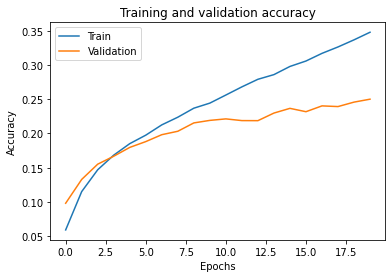

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**MNIST**

In [68]:
#loading the data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


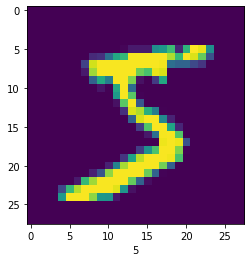

In [27]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])
plt.show()

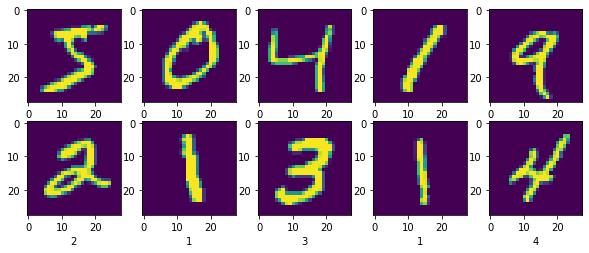

In [41]:
plt.figure(figsize=(10,10))

for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

In [70]:
#preprocessing
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [71]:
# Model building

#initializer=keras.initializers.glorot_normal()
#initializer=keras.initializers.lecun_uniform()
initializer=keras.initializers.glorot_uniform()

model=Sequential([
                  Dense(1024,input_dim=784,kernel_initializer=initializer,bias_initializer=initializer,activation='relu'),
                  Dense(1000,activation='relu',kernel_initializer=initializer,bias_initializer=initializer),
                  Dense(512,activation='relu',kernel_initializer=initializer,bias_initializer=initializer),
                  Dense(10,activation='softmax',kernel_initializer=initializer,bias_initializer=initializer)
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_33 (Dense)             (None, 1000)              1025000   
_________________________________________________________________
dense_34 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                5130      
Total params: 2,346,482
Trainable params: 2,346,482
Non-trainable params: 0
_________________________________________________________________


Metrics = Accuracy

In [63]:
# compile model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

#fitting model
filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5"
earlystopping=keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5, mode="min")
checkpoint=keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode="max")


In [64]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=20,verbose=1,callbacks=[earlystopping,checkpoint]) 

Epoch 1/20
1477/1500 [============================>.] - ETA: 0s - loss: 0.5797 - accuracy: 0.8529
Epoch 00001: val_accuracy improved from -inf to 0.91325, saving model to weights.01-0.30.hdf5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.8540 - val_loss: 0.2980 - val_accuracy: 0.9133
Epoch 2/20
1483/1500 [============================>.] - ETA: 0s - loss: 0.2558 - accuracy: 0.9267
Epoch 00002: val_accuracy improved from 0.91325 to 0.93958, saving model to weights.02-0.21.hdf5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9269 - val_loss: 0.2138 - val_accuracy: 0.9396
Epoch 3/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9430
Epoch 00003: val_accuracy improved from 0.93958 to 0.95108, saving model to weights.03-0.18.hdf5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1996 - accuracy: 0.9430 - val_loss: 0.1817 - val_accuracy: 0.9511
Epoch 4/20
1496/150

In [65]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print('test set loss : ',test_loss)
print('test set accuracy : ',test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9789
test set loss :  0.06755856424570084
test set accuracy :  0.9789000153541565


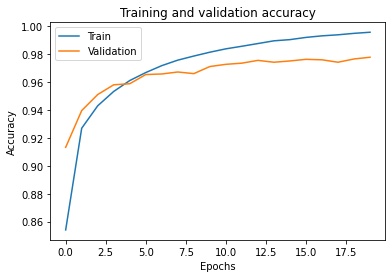

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

Metrics = Categorical_accuracy

In [72]:
# compile model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fitting model
filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5"
earlystopping=keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5, mode="min")
checkpoint=keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode="max")

history=model.fit(x_train,y_train,validation_split=0.2,epochs=20,verbose=1,callbacks=[earlystopping,checkpoint]) 

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5705 - categorical_accuracy: 0.8582 - val_loss: 0.2684 - val_categorical_accuracy: 0.9228
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2515 - categorical_accuracy: 0.9286 - val_loss: 0.2197 - val_categorical_accuracy: 0.9372
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1976 - categorical_accuracy: 0.9434 - val_loss: 0.1706 - val_categorical_accuracy: 0.9530
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1617 - categorical_accuracy: 0.9534 - val_loss: 0.1538 - val_categorical_accuracy: 0.9557
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1366 - categorical_accuracy: 0.9614 - val_loss: 0.1445 - val_categorical_accuracy: 0.9572
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1173 - categorical_accuracy: 0.9656 - val_loss: 0.1296 - val_categorical_accuracy:

In [73]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print('test set loss : ',test_loss)
print('test set accuracy : ',test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - categorical_accuracy: 0.9795
test set loss :  0.06764566153287888
test set accuracy :  0.9794999957084656


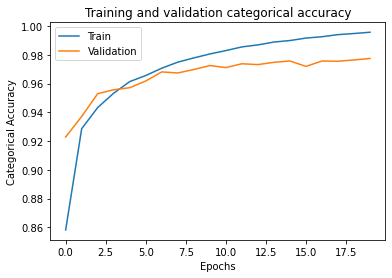

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training and validation categorical accuracy')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Fashion_MNIST**

In [75]:
#loading the data
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


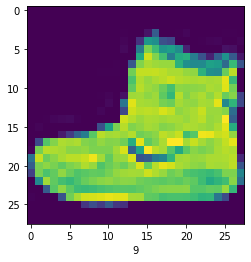

In [77]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])
plt.show()

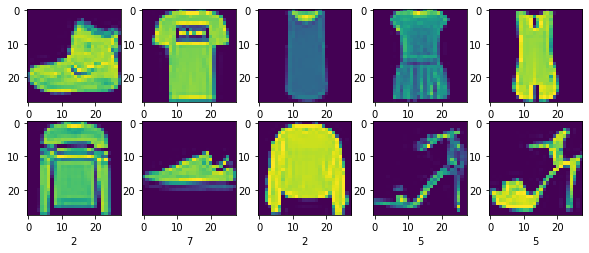

In [78]:
plt.figure(figsize=(10,10))

for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

In [79]:
#preprocessing
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [80]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [81]:
# Model building

#initializer=keras.initializers.glorot_normal()
#initializer=keras.initializers.lecun_uniform()
initializer=keras.initializers.glorot_uniform()

model=Sequential([
                  Dense(1024,input_dim=784,kernel_initializer=initializer,bias_initializer=initializer,activation='relu'),
                  Dense(1000,activation='relu',kernel_initializer=initializer,bias_initializer=initializer),
                  Dense(512,activation='relu',kernel_initializer=initializer,bias_initializer=initializer),
                  Dense(10,activation='softmax',kernel_initializer=initializer,bias_initializer=initializer)
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_37 (Dense)             (None, 1000)              1025000   
_________________________________________________________________
dense_38 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                5130      
Total params: 2,346,482
Trainable params: 2,346,482
Non-trainable params: 0
_________________________________________________________________


In [85]:
# compile model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['top_k_categorical_accuracy'])

#fitting model
filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5"
earlystopping=keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=5, mode="min")
checkpoint=keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode="max")

history=model.fit(x_train,y_train,validation_split=0.2,epochs=20,verbose=1,callbacks=[earlystopping,checkpoint]) 

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6980 - top_k_categorical_accuracy: 0.9864 - val_loss: 0.5052 - val_top_k_categorical_accuracy: 0.9958
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4626 - top_k_categorical_accuracy: 0.9960 - val_loss: 0.4495 - val_top_k_categorical_accuracy: 0.9965
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4162 - top_k_categorical_accuracy: 0.9965 - val_loss: 0.4088 - val_top_k_categorical_accuracy: 0.9968
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3857 - top_k_categorical_accuracy: 0.9968 - val_loss: 0.3972 - val_top_k_categorical_accuracy: 0.9967
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3660 - top_k_categorical_accuracy: 0.9972 - val_loss: 0.3746 - val_top_k_categorical_accuracy: 0.9967
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3465 - top_k_categoric

In [86]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print('test set loss : ',test_loss)
print('test set accuracy : ',test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3657 - top_k_categorical_accuracy: 0.9973
test set loss :  0.3657165467739105
test set accuracy :  0.9973000288009644


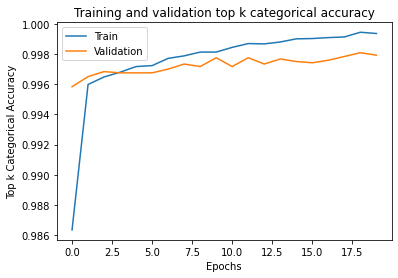

In [87]:
import matplotlib.pyplot as plt

plt.plot(history.history['top_k_categorical_accuracy'])
plt.plot(history.history['val_top_k_categorical_accuracy'])
plt.title('Training and validation top k categorical accuracy')
plt.ylabel('Top k Categorical Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()